C:\Users\Default.DESKTOP-H4O1L0D\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Default.DESKTOP-H4O1L0D\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Default.DESKTOP-H4O1L0D\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


5.0
15.333333333333334


C:\Users\Default.DESKTOP-H4O1L0D\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Default.DESKTOP-H4O1L0D\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


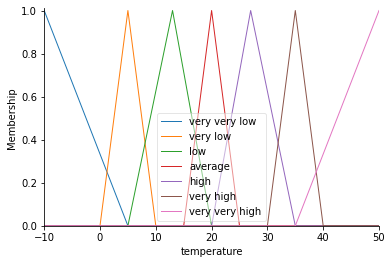

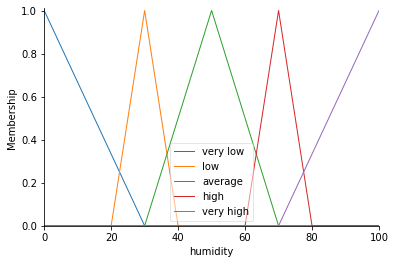

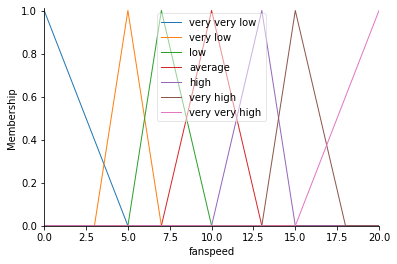

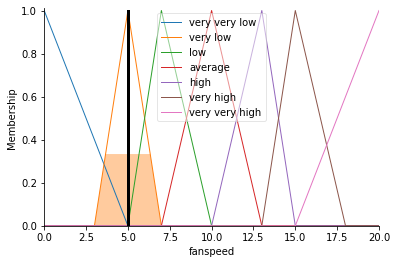

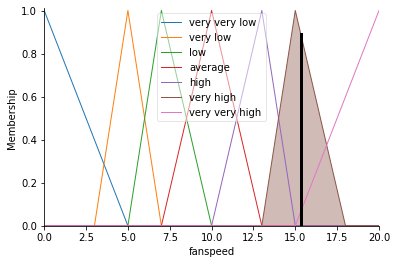

In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
temperature = ctrl.Antecedent(np.arange(-10, 51, 1), 'temperature')
humidity = ctrl.Antecedent(np.arange(0, 101, 1), 'humidity')
fanspeed = ctrl.Consequent(np.arange(0, 21, 1), 'fanspeed')
temperature['very very low'] = fuzz.trimf(temperature.universe, [-10, -10, 5])
temperature['very low'] = fuzz.trimf(temperature.universe, [0, 5, 10])
temperature['low'] = fuzz.trimf(temperature.universe, [5, 13, 20])
temperature['average'] = fuzz.trimf(temperature.universe, [15, 20, 25])
temperature['high'] = fuzz.trimf(temperature.universe, [20, 27, 35])
temperature['very high'] = fuzz.trimf(temperature.universe, [30, 35, 40])
temperature['very very high'] = fuzz.trimf(temperature.universe, [35, 50, 50])
temperature.view()
humidity['very low'] = fuzz.trimf(humidity.universe, [0, 0, 30])
humidity['low'] = fuzz.trimf(humidity.universe, [20, 30, 40])
humidity['average'] = fuzz.trimf(humidity.universe, [30, 50, 70])
humidity['high'] = fuzz.trimf(humidity.universe, [60, 70, 80])
humidity['very high'] = fuzz.trimf(humidity.universe, [70, 100, 100])
humidity.view()
fanspeed['very very low'] = fuzz.trimf(fanspeed.universe, [0, 0, 5])
fanspeed['very low'] = fuzz.trimf(fanspeed.universe, [3, 5, 7])
fanspeed['low'] = fuzz.trimf(fanspeed.universe, [5, 7, 10])
fanspeed['average'] = fuzz.trimf(fanspeed.universe, [7, 10, 13])
fanspeed['high'] = fuzz.trimf(fanspeed.universe, [10, 13, 15])
fanspeed['very high'] = fuzz.trimf(fanspeed.universe, [13, 15, 18])
fanspeed['very very high'] = fuzz.trimf(fanspeed.universe, [15, 20, 20])
fanspeed.view()
rule1 = ctrl.Rule(antecedent = (temperature['very very low']), consequent = (fanspeed['very low']))
rule2 = ctrl.Rule(antecedent = (temperature['very low']), consequent = (fanspeed['very low']))
rule3 = ctrl.Rule(antecedent = ((temperature['low'] | temperature['average']) &  (humidity['very low'])), consequent
                  = (fanspeed['low']))
rule4 = ctrl.Rule(antecedent = ((temperature['average'] | temperature['high']) & (humidity['average'] | humidity['high'])),
                  consequent = (fanspeed['low']))
rule5 = ctrl.Rule(antecedent = (temperature['high'] & humidity['very high']), consequent = (fanspeed['high']))
rule6 = ctrl.Rule(antecedent = (temperature['very high']), consequent = (fanspeed['very high']))
rule7 = ctrl.Rule(antecedent = (temperature['very very high']), consequent = (fanspeed['very very high']))
fan_speed_control = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7])
fan_speed = ctrl.ControlSystemSimulation(fan_speed_control)
fan_speed.input['temperature'] = 0
fan_speed.input['humidity'] = 20
fan_speed.compute()
print(fan_speed.output['fanspeed'])
fanspeed.view(sim=fan_speed)
fan_speed.input['temperature'] = 35
fan_speed.input['humidity'] = 88
fan_speed.compute()
print(fan_speed.output['fanspeed'])
fanspeed.view(sim=fan_speed)

In [1]:
import gym
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
env = gym.make('MountainCar-v0')
#env = gym.make('MountainCarContinuous-v0')
env.reset()
location = ctrl.Antecedent(np.arange(-1.2, 0.6, 0.1), 'location')
speed = ctrl.Antecedent(np.arange(-0.07, 0.07, 0.01), 'speed')
force = ctrl.Consequent(np.arange(-1, 1, 0.1), 'force')
location['low'] = fuzz.trimf(location.universe, [-1.2, -1.2, -0.4])
location['average'] = fuzz.trimf(location.universe, [-0.6, -0.3, 0])
location['high'] = fuzz.trimf(location.universe, [-0.2, 0.6, 0.6])
speed['low'] = fuzz.trimf(speed.universe, [-0.07, -0.07, -0.02])
speed['average'] = fuzz.trimf(speed.universe, [-0.03, 0, 0.03])
speed['high'] = fuzz.trimf(speed.universe, [0.02, 0.07, 0.07])
force['low'] = fuzz.trimf(force.universe, [-1, -1, -0.3])
force['average'] = fuzz.trimf(force.universe, [-0.4, 0, 0.4])
force['high'] = fuzz.trimf(force.universe, [0.3, 1, 1])
rule1 = ctrl.Rule(antecedent = ((location['low']) &  (speed['low'])), consequent = (force['low']))
rule2 = ctrl.Rule(antecedent = ((location['average']) & (speed['average'])), consequent = (force['average']))
rule3 = ctrl.Rule(antecedent = ((location['high']) &  (speed['high'])), consequent = (force['high']))
rule4 = ctrl.Rule(antecedent = ((location['average'] | location['high']) & (speed['high'])), consequent = (force['high']))
rule5 = ctrl.Rule(antecedent = ((location['high']) & (speed['average'] | speed['high'])), consequent = (force['high']))
force_control = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])
for i_episode in range(20):
    observation = env.reset()
    for t in range(100):
        env.render()
        print(observation)
        action = env.action_space.sample()
        observation, reward, done, info = env.step(action)
        if done:
            print("Episode finished after {} timesteps".format(t+1))
            break
env.close()

[-0.4289611  0.       ]
[-4.2866138e-01  2.9971451e-04]
[-0.4280641   0.00059727]
[-4.2817357e-01 -1.0946959e-04]
[-0.428989   -0.00081542]
[-0.4305045  -0.00151551]
[-0.43170917 -0.00120467]
[-0.43259433 -0.00088515]
[-0.43315357 -0.00055924]
[-0.43438286 -0.00122928]
[-0.43627328 -0.00189044]
[-0.4378112  -0.00153792]
[-0.43898544 -0.00117424]
[-0.44178748 -0.00280205]
[-0.444197   -0.00240949]
[-0.44819638 -0.00399939]
[-0.45375648 -0.0055601 ]
[-0.4588366  -0.00508009]
[-0.46339932 -0.00456276]
[-0.46741113 -0.0040118 ]
[-0.47084236 -0.00343122]
[-0.47466758 -0.00382524]
[-0.4798585  -0.00519091]
[-0.48437652 -0.00451802]
[-0.49018803 -0.00581151]
[-0.4952497  -0.00506167]
[-0.50052375 -0.00527403]
[-0.50497067 -0.00444696]
[-0.50855726 -0.00358659]
[-0.5122567  -0.00369937]
[-0.51504105 -0.00278442]
[-0.5168897  -0.00184859]
[-0.51978856 -0.00289891]
[-0.52371603 -0.00392748]
[-0.52764267 -0.0039266 ]
[-0.53153896 -0.00389628]
[-0.53537565 -0.00383673]
[-0.5381241  -0.00274842]
[-

[-0.5098573  -0.00864333]
[-0.51760364 -0.00774636]
[-0.525395   -0.00779132]
[-0.53417283 -0.00877785]
[-0.54287136 -0.00869856]
[-0.55242544 -0.0095541 ]
[-0.56276363 -0.01033817]
[-0.57180876 -0.00904511]
[-0.5804935  -0.00868479]
[-0.5887537  -0.00826015]
[-0.5965283  -0.00777459]
[-0.6047602  -0.00823197]
[-0.6133895  -0.00862926]
[-0.62135345 -0.00796394]
[-0.6285947  -0.00724125]
[-0.63606143 -0.00746674]
[-0.6427006  -0.00663918]
[-0.6494654 -0.0067648]
[-0.6553085  -0.00584307]
[-0.6601892  -0.00488075]
[-0.663074   -0.00288476]
[-0.6649429  -0.00186895]
[-0.6667833  -0.00184035]
[-6.6658247e-01  2.0081080e-04]
[-0.66434187  0.0022406 ]
[-0.6620768   0.00226509]
[-0.65980273  0.00227406]
[-0.6565353  0.0032674]
[-0.65129715  0.0052382 ]
[-0.64512444  0.00617268]
[-0.63706034  0.00806407]
[-0.62816167  0.00889869]
[-0.6194916   0.00867012]
[-0.61011213  0.00937944]
[-0.6010911   0.00902103]
[-0.5924941  0.008597 ]
[-0.5843841   0.00811004]
[-0.5758206   0.00856341]
[-0.5668672 

[-0.59461874 -0.00733313]
[-0.6004232 -0.0058045]
[-0.6066566 -0.0062334]
[-0.6112735 -0.0046169]
[-0.61624044 -0.00496689]
[-0.6215214  -0.00528099]
[-0.6250785  -0.00355709]
[-0.6268862  -0.00180769]
[-6.2693155e-01 -4.5374538e-05]
[-0.62621427  0.00071727]
[-6.2573951e-01  4.7478592e-04]
[-0.6235106   0.00222891]
[-0.6215435   0.00196708]
[-0.61985236  0.00169114]
[-0.61744934  0.00240305]
[-0.61335164  0.00409767]
[-0.60858893  0.00476271]
[-0.6041957   0.00439325]
[-0.5992038   0.00499186]
[-0.5936498   0.00555404]
[-0.58757424  0.00607557]
[-0.5810218   0.00655244]
[-0.5730408   0.00798099]
[-0.56369036  0.00935045]
[-0.55403996  0.00965041]
[-0.54416156  0.0098784 ]
[-0.53312904  0.01103252]
[-0.52102506  0.01210399]
[-0.50894034  0.01208469]
[-0.49796557  0.01097478]
[-0.48718283  0.01078273]
[-0.4776727   0.00951015]
[-0.4675059   0.01016679]
[-0.45875782  0.00874808]
[-0.45049298  0.00826483]
[-0.44177207  0.00872092]
[-0.4336587   0.00811337]
[-0.4262117   0.00744697]
[-0.41

[-4.8318279e-01 -4.0410095e-04]
[-0.48488927 -0.00170648]
[-0.48788542 -0.00299615]
[-0.4901489  -0.00226349]
[-0.49166283 -0.00151394]
[-0.49441594 -0.00275309]
[-0.4963876  -0.00197168]
[-0.49956316 -0.00317554]
[-0.5029188  -0.00335565]
[-0.50642943 -0.00351065]
[-0.50906885 -0.00263937]
[-0.51281714 -0.00374831]
[-0.5176463  -0.00482915]
[-0.52252007 -0.0048738 ]
[-0.52640194 -0.00388189]
[-0.52926284 -0.00286086]
[-0.53308123 -0.00381838]
[-0.53682846 -0.00374728]
[-0.5394766  -0.00264808]
[-0.5410056  -0.00152904]
[-5.4140413e-01 -3.9854806e-04]
[-0.5406692   0.00073493]
[-0.5388063  0.0018629]
[-0.5378294   0.00097692]
[-0.5367458   0.00108362]
[-0.5355636   0.00118219]
[-0.5342917   0.00127191]
[-0.53193957  0.00235209]
[-0.529525    0.00241464]
[-0.5270659   0.00245909]
[-0.5245808   0.00248509]
[-0.52308834  0.00149245]
[-0.5205997   0.00248863]
[-0.5181336   0.00246613]
[-0.5147084   0.00342515]
[-0.5113499   0.00335848]
[-0.50808334  0.00326663]
[-0.505933    0.00215031]
[-

[-0.5594804   0.00091375]
[-0.5572981   0.00218234]
[-0.55586344  0.00143466]
[-0.5541872   0.00167627]
[-0.55328184  0.00090536]
[-0.5521541   0.00112769]
[-0.54981256  0.00234159]
[-0.54627454  0.00353799]
[-0.5415666   0.00470793]
[-0.537724    0.00384262]
[-0.5347755   0.00294853]
[-0.53274316  0.00203234]
[-0.5296422   0.00310091]
[-0.525496    0.00414624]
[-0.5223355   0.00316046]
[-0.5191845   0.00315099]
[-0.5150666   0.00411788]
[-0.51001275  0.0050539 ]
[-0.5060607   0.00395203]
[-0.50324017  0.00282056]
[-0.4995722   0.00366796]
[-0.4950843   0.00448792]
[-0.49180996  0.00327432]
[-0.48877367  0.00303627]
[-0.48699814  0.00177555]
[-0.48449653  0.0025016 ]
[-0.4832875   0.00120901]
[-0.48238012  0.00090741]
[-4.8278105e-01 -4.0094490e-04]
[-0.48448738 -0.00170631]
[-0.48748636 -0.00299898]
[-0.49075565 -0.00326929]
[-0.49427086 -0.00351522]
[-0.49900573 -0.00473489]
[-0.5049249  -0.00591917]
[-0.5099841  -0.00505915]
[-0.5251326  0.       ]
[-5.251211e-01  1.150340e-05]
[-0.

[-4.6364453e-01  2.7651273e-04]
[-4.6381527e-01 -1.7072348e-04]
[-0.46443197 -0.0006167 ]
[-0.4654901  -0.00105812]
[-0.46698183 -0.00149174]
[-0.46789616 -0.00091432]
[-0.4692263  -0.00133015]
[-0.47196245 -0.00273614]
[-0.47408432 -0.00212186]
[-0.47657618 -0.00249186]
[-0.47941953 -0.00284336]
[-0.48259327 -0.00317374]
[-0.48507378 -0.0024805 ]
[-0.48884255 -0.0037688 ]
[-0.49387157 -0.005029  ]
[-0.49912322 -0.00525165]
[-0.5035583  -0.00443506]
[-0.50914353 -0.00558527]
[-0.5148372  -0.00569365]
[-0.52159655 -0.00675935]
[-0.5293709  -0.00777437]
[-0.538102   -0.00873108]
[-0.54772437 -0.00962234]
[-0.42110077  0.        ]
[-0.42185745 -0.00075668]
[-0.42436537 -0.00250795]
[-0.42760664 -0.00324125]
[-0.4305579  -0.00295128]
[-0.43519798 -0.00464006]
[-0.44049332 -0.00529532]
[-0.4474055  -0.00691218]
[-0.45488414 -0.00747866]
[-0.46287453 -0.00799038]
[-0.4723178 -0.0094433]
[-0.4821442  -0.00982639]
[-0.49228072 -0.0101365 ]
[-0.50165176 -0.00937104]
[-0.51118726 -0.00953552]
[-

[-0.46696264 -0.00292555]
[-0.4693109  -0.00234828]
[-0.47106457 -0.00175365]
[-0.4722106  -0.00114602]
[-0.47274047 -0.00052991]
[-0.47365037 -0.00090987]
[-0.47593343 -0.00228308]
[-0.4795728  -0.00363935]
[-0.56865525  0.        ]
[-5.6831837e-01  3.3689570e-04]
[-0.5676471   0.00067129]
[-0.5656464   0.00200069]
[-0.5643312   0.00131521]
[-0.56271124  0.00161994]
[-0.56179863  0.00091262]
[-0.5596002   0.00219849]
[-0.5561322   0.00346797]
[-0.5524206   0.00371159]
[-0.5484931   0.00392748]
[-0.5443791   0.00411401]
[-0.5411093   0.00326977]
[-0.53870827  0.00240103]
[-0.535194    0.00351432]
[-0.53059274  0.00460126]
[-0.524939    0.00565371]
[-0.5182752   0.00666377]
[-0.5126514   0.00562384]
[-0.5081096   0.00454175]
[-0.50468403  0.00342562]
[-0.5004002   0.00428384]
[-0.49629018  0.00410999]
[-0.4923848  0.0039054]
[-0.48771313  0.00467164]
[-0.48331013  0.00440302]
[-0.48020852  0.00310159]
[-0.47643146  0.00377708]
[-0.47200695  0.00442451]
[-0.46696782  0.00503911]
[-0.4613